## Majid Feiz 
## Medical Testing Analysis & Visualization (Bayesian Inference Application)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy as stat
import sklearn.linear_model as LinearRegression

In [22]:
#used this to suppress the percision when printing
def print(*args):
    __builtins__.print(*("%.3f" % a if isinstance(a, float) else a
                         for a in args))

### Bayesian Inference

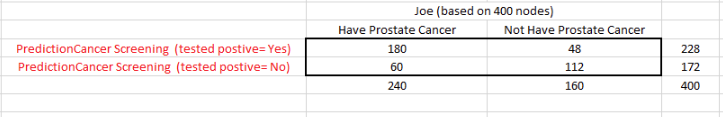
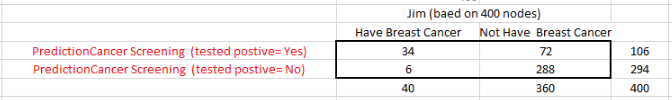






#### Step 2

<Figure size 432x288 with 0 Axes>

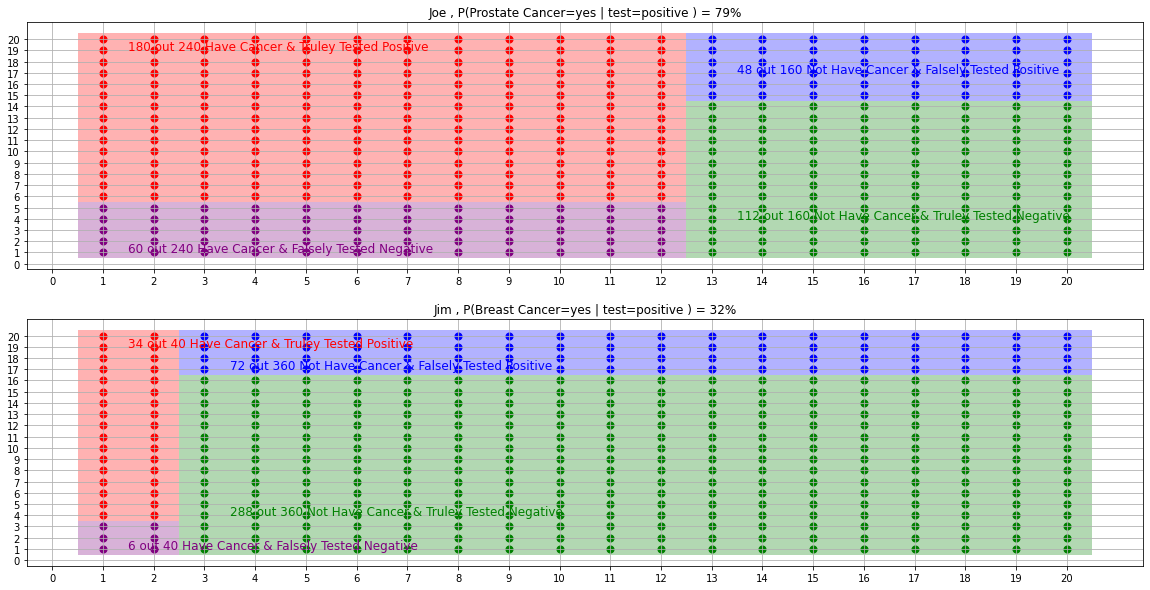

In [39]:
# Sample code placing dots on grid and highligting portion of diplayed dots.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
from matplotlib.patches import Rectangle
# Create a grid that can place at least 400 (=20x20) dots.

def xy_tp(TP, tot):
    num_of_col_tp = tot//(20)
    num_of_row_tp = TP //num_of_col_tp
    xtp =[i for i in range(1,num_of_col_tp+1)]
    Xtp=xtp*np.ones((num_of_row_tp,1))
    
    ytp ={}
    for i in range(1,num_of_row_tp+1):
        ytp[i] = (num_of_col_tp)*[20+1-i]
    Ytp=list(ytp.values())
    
    return (Xtp, Ytp)

def xy_fn(FN, tot):
    num_of_col_fn = tot//(20)
    num_of_row_fn = FN //num_of_col_fn
    xfn =[i for i in range(1,num_of_col_fn+1)]
    Xfn=xfn*np.ones((num_of_row_fn,1))
    
    yfn ={}
    for i in range(1,num_of_row_fn+1):
        yfn[i] = num_of_col_fn*[(num_of_row_fn+1)-i]
    Yfn=list(yfn.values())
    
    return (Xfn, Yfn)

#--------------------------------
def xy_fp(FP, tot):
    num_of_col_fp = tot//(20)
    num_of_row_fp = FP //num_of_col_fp
    start_col_fp = 20 - num_of_col_fp
    xfp =[i for i in range(start_col_fp+1,20+1)]
    Xfp=xfp*np.ones((num_of_row_fp,1))
    
    yfp ={}
    for i in range(1,num_of_row_fp+1):
        yfp[i] = num_of_col_fp*[20+1-i]
    Yfp=list(yfp.values())
    
    return (Xfp, Yfp)

def xy_tn(TN, tot):
    num_of_col_tn = tot//(20)
    num_of_row_tn = TN //num_of_col_tn
    start_col_tn = 20 - num_of_col_tn
    xtn =[i for i in range(start_col_tn+1,20+1)]
    Xtn=xtn*np.ones((num_of_row_tn,1))
    
    ytn ={}
    for i in range(1,num_of_row_tn+1):
        ytn[i] = num_of_col_tn*[(num_of_row_tn+1)-i]
    Ytn=list(ytn.values())
    
    return (Xtn, Ytn)


# Highlighting cases, e.g., TP, FP, TN, or FN.
def Highlighter_tp(TP,tot):
    num_of_col_tp = tot//(20)
    num_of_row_tp = TP //num_of_col_tp
    h= 20 - num_of_row_tp + 1
    b = num_of_col_tp+1
    someX = num_of_col_tp+1
    someY = h # 2
    width, height =1-b,20+1-h
    currentAxis = plt.gca()
    currentAxis.text(1.5, 20-1, str(num_of_col_tp*num_of_row_tp)+' out '+str(tot)+
                     ' Have Cancer & Truley Tested Positive', fontsize='large',color = 'red')
    currentAxis.add_patch(Rectangle((someX-0.5, someY-0.5), width, height, facecolor='red', alpha=0.3))
    return currentAxis
    
    
def Highlighter_fn(FN,tot):
    num_of_col_fn = tot//(20)
    num_of_row_fn = FN //num_of_col_fn
    h=  1 # bottom 
    b = num_of_col_fn+1
    someX = num_of_col_fn+1
    someY=h # 2
    width, height = 1-b,num_of_row_fn #top
    currentAxis = plt.gca()
    currentAxis.text(1.5, 1, str(num_of_col_fn*num_of_row_fn)+' out '+str(tot)+
                     ' Have Cancer & Falsely Tested Negative', fontsize='large', c = 'purple')
    currentAxis.add_patch(Rectangle((someX-0.5, someY-0.5), width, height, facecolor='purple', alpha=0.3))
    return currentAxis


def Highlighter_fp(FP,tot):
    num_of_col_fp = tot//(20)
    num_of_row_fp = FP //num_of_col_fp
    start_col_fp = 20 - num_of_col_fp
    h= 20 - num_of_row_fp + 1 
    b = num_of_col_fp+(20-num_of_col_fp)+1
    someX=num_of_col_fp+(20-num_of_col_fp)+1
    someY=h # 2
    width, height =(20-num_of_col_fp)+1-b,20+1-h
    currentAxis = plt.gca()
    currentAxis.text(start_col_fp+1.5, 20-3, str(num_of_col_fp*num_of_row_fp)+' out '+str(tot)
                     +' Not Have Cancer & Falsely Tested Positive', fontsize='large', c='blue')
    currentAxis.add_patch(Rectangle((someX-0.5, someY-0.5), width, height, facecolor='blue', alpha=0.3))
    return currentAxis
    

    
def Highlighter_tn(TN,tot):
    num_of_col_tn = tot//(20)
    num_of_row_tn = TN //num_of_col_tn
    start_col_tn = 20 - num_of_col_tn
    h=  1 # bottom 
    b = num_of_col_tn+(20-num_of_col_tn)+1
    someX = num_of_col_tn+(20-num_of_col_tn)+1
    someY = h # 2
    width, height = (20-num_of_col_tn)+1-b,num_of_row_tn #top
    currentAxis = plt.gca()
    currentAxis.text(start_col_tn+1.5, 1+3, str(num_of_col_tn*num_of_row_tn)+' out '+str(tot)+
                     ' Not Have Cancer & Truley Tested Negative', fontsize='large', c='green')
    currentAxis.add_patch(Rectangle((someX-0.5, someY-0.5), width, height, facecolor='green', alpha=0.3))
    return currentAxis



# Place TP dots.
TP_Joe=180; FN_Joe=60; tot_p_Joe = 240; FP_Joe=48; TN_Joe = 112; tot_notP_Joe = 160
xtp_Joe, ytp_Joe = xy_tp(TP_Joe, tot_p_Joe);
xfn_Joe, yfn_Joe = xy_fn(FN_Joe, tot_p_Joe);
xfp_Joe, yfp_Joe = xy_fp(FP_Joe, tot_notP_Joe); 
xtn_Joe, ytn_Joe = xy_tn(TN_Joe, tot_notP_Joe);

TP_Jim=34; FN_Jim=6; tot_p_Jim = 40; FP_Jim=72; TN_Jim = 288; tot_notP_Jim = 360
xtp_Jim, ytp_Jim = xy_tp(TP_Jim, tot_p_Jim);
xfn_Jim, yfn_Jim = xy_fn(FN_Jim, tot_p_Jim); 
xfp_Jim, yfp_Jim = xy_fp(FP_Jim, tot_notP_Jim); 
xtn_Jim, ytn_Jim = xy_tn(TN_Jim, tot_notP_Jim);


# plt.xlabel('x') # putting x-axis labels
# plt.ylabel('y') # putting y-axis labels
fig = plt.figure();
fig = plt.figure(figsize=(20, 10));

ax1 = plt.subplot2grid((2,1), (0,0));
ax1.grid(True);
ax1.set_title('Joe , P(Prostate Cancer=yes | test=positive ) = 79%');
ax1 = fig.gca();
ax1.set_xticks(np.arange(0, 20+1,1));
ax1.set_yticks(np.arange(0, 20+1, 1));

ax1.scatter(xtp_Joe, ytp_Joe, color = "red", marker = "o", s = 50) ;
ax1.scatter(xfn_Joe, yfn_Joe, color = "purple", marker = "o", s = 50);
ax1.scatter(xfp_Joe, yfp_Joe, color = "blue", marker = "o", s = 50);
ax1.scatter(xtn_Joe, ytn_Joe, color = "green", marker = "o", s = 50);
Highlighter_tp(TP_Joe,tot_p_Joe);
Highlighter_fn(FN_Joe,tot_p_Joe);
Highlighter_fp(FP_Joe,tot_notP_Joe);
Highlighter_tn(TN_Joe,tot_notP_Joe);


ax2 = plt.subplot2grid((2,1), (1,0)) ;
ax2.grid(True);
ax2.set_title('Jim , P(Breast Cancer=yes | test=positive ) = 32%');
ax2 = fig.gca();
ax2.set_xticks(np.arange(0, 20+1,1));
ax2.set_yticks(np.arange(0, 20+1, 1));

ax2.scatter(xtp_Jim, ytp_Jim, color = "red", marker = "o", s = 50) ;
ax2.scatter(xfn_Jim, yfn_Jim, color = "purple", marker = "o", s = 50);
ax2.scatter(xfp_Jim, yfp_Jim, color = "blue", marker = "o", s = 50);
ax2.scatter(xtn_Jim, ytn_Jim, color = "green", marker = "o", s = 50);
Highlighter_tp(TP_Jim, tot_p_Jim);
Highlighter_fn(FN_Jim, tot_p_Jim);
Highlighter_fp(FP_Jim, tot_notP_Jim);
Highlighter_tn(TN_Jim, tot_notP_Jim);



Considering the sensitivity and specificity of the cancer test, we could use the Bayesian theory to calculate the likelihood of having cancer and have a positive test among all positive test populations.  In the figure above, the total area of red and blue is the population of people who tested positive. Red zone the people who have cancer and truly tested positive prediction (subjected to the test's sensitivity).
As seen in the figure, the red area is larger in Joe (with prostate cancer) comparing to Jim ( with breast cancer); thus, with all uncertainty of the test cancer consideration, it is more likely that Joe has Prostate cancer (with ~79% probability) and it is less likely (with ~32%) that Jim would have a breast cancer. 